In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("./Lab Session Data.xlsx",sheet_name = None); #Loading complete sheet

**A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data
and segregate them into 2 matrices A & C (following the nomenclature of AX = C)**

In [3]:
#defining segregating function
pdata = df["Purchase data"].iloc[:,0:5]
def segregate():
    print(pdata)
    A = np.array(pdata.iloc[:,1:4]) #changing into matrix
    C = np.array(pdata.iloc[:,4]) #changing into matrix
    C = np.array(pdata.iloc[:,4])
    s = C.shape[0] 
    C = C.reshape(s,1) #reshaping it to make form AX = C
    return [A,C]
[A,C] = segregate() #getting segregated data such that AX = C
print("value of A:\n",A)
print("value of C:\n",C)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198
value of A:
 [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
value of C:
 [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]


**What is the dimensionality of the vector space for this data?**

In [4]:
def getDimension(X):
    dimensionality = X.shape[1]
    print(f"Dimensionality of the vector space: {dimensionality}")
getDimension(A)
getDimension(C)

Dimensionality of the vector space: 3
Dimensionality of the vector space: 1


**How many vectors exist in this vector space?**

In [5]:
def getNoofVectors(X):
    print(f"No of vectors in vector space is {X.shape[0]}")
getNoofVectors(A)
getNoofVectors(C)

No of vectors in vector space is 10
No of vectors in vector space is 10


**What is the rank of Matrix A?**

In [6]:
#Finding rank
def getRank(A):
    return np.linalg.matrix_rank(A)
print("Rank of A is ",getRank(A))

Rank of A is  3


**Using Pseudo-Inverse find the cost of each product available for sale.
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a
pseudo-inverse.)**

In [7]:
def getCost():
    inv = np.linalg.pinv(A)
    cost = np.matmul(inv,C)
    print("Candies:Rs ",round(cost[0,0],0)," Mangoes:Rs ",round(cost[1,0],0)," MilkPackets:Rs ",round(cost[2,0],0))
    return cost
cost = getCost()

Candies:Rs  1.0  Mangoes:Rs  55.0  MilkPackets:Rs  18.0


**A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products
available with the vendor.**

In [8]:
def addSolution():
    d = {"Product":["Candies","Mangoes","Milk Packets"],
         "cost":np.ndarray.tolist(cost.ravel())
        }
    ans = pd.DataFrame(d)
    print(ans)
addSolution()

        Product  cost
0       Candies   1.0
1       Mangoes  55.0
2  Milk Packets  18.0


**A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on
purchase behavior.**

In [9]:
def classifier():
    pdata['status'] = ['Rich' if x > 200 else 'Poor' for x in pdata['Payment (Rs)']] #classifying on basis of value 200
classifier()
print(pdata)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) status
0      C_1           20             6                 2           386   Rich
1      C_2           16             3                 6           289   Rich
2      C_3           27             6                 2           393   Rich
3      C_4           19             1                 2           110   Poor
4      C_5           24             4                 2           280   Rich
5      C_6           22             1                 5           167   Poor
6      C_7           15             4                 2           271   Rich
7      C_8           18             4                 2           274   Rich
8      C_9           21             1                 4           148   Poor
9     C_10           16             2                 4           198   Poor


**A4. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the
following after loading the data to your programming platform.**

In [10]:
irctcdata = df["IRCTC Stock Price"] #loading irctc data
print(irctcdata)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

**Calculate the mean and variance of the Price data present in column D.**

In [11]:
import statistics as st

In [12]:
def getMeanAndVariance(column):
    price = irctcdata[column]
    mprice = st.mean(price)
    var = st.variance(price)
    return [mprice,var]
[mn,var]=getMeanAndVariance("Price")
print("Price mean:",mn,"\nPrice variance:",var)

Price mean: 1560.663453815261 
Price variance: 58732.365352539186


**Select the price data for all Wednesdays and calculate the sample mean. Compare the mean
with the population mean and note your observations.**

In [13]:
def getMeanofDay(Day):
    Daydata = irctcdata[ irctcdata["Day"] == Day]['Price']
    Daymean = st.mean(Daydata)
    return Daymean
print("Wednesdays mean:",getMeanofDay("Wed"))

Wednesdays mean: 1550.706


*->The mean of wednesday is found to be 1550.706 which is almost equal to population mean*

**Select the price data for the month of Apr and calculate the sample mean. Compare the
mean with the population mean and note your observations.**

In [14]:
def getMeanofMonth(mon):
    Daydata = irctcdata[ irctcdata["Month"] == mon]['Price']
    Monmean = st.mean(Daydata)
    return Monmean
print("April mean:",getMeanofMonth("Apr"))

April mean: 1698.9526315789474


*-> The mean of april is 150 more than population mean*

**From the Chg% (available in column I) find the probability of making a loss over the stock.
(Suggestion: use lambda function to find negative values)**

In [15]:
#probability of loss
def probabilityOfLoss():
    perchange = irctcdata['Chg%']
    totalcount = perchange.size
    negcount = perchange[perchange<0].size
    prob = negcount/totalcount * 100
    return prob
print("Probability of loss",probabilityOfLoss(),"%")

Probability of loss 49.79919678714859 %


**Calculate the probability of making a profit on Wednesday.
Calculate the conditional probability of making profit, given that today is Wednesday.**

In [16]:
def prob_of_Loss_on_Day():
    mask1 = irctcdata['Chg%']>0
    mask2 = irctcdata['Day'] == "Wed"
    wedprofitdayscount = irctcdata[mask1 & mask2].shape[0]
    weddayscount = irctcdata[mask2].shape[0]
    prob_of_wedprofit = wedprofitdayscount / weddayscount
    print("Probability of profit on wednesday:",prob_of_wedprofit*100,"%")
    totalcount = irctcdata.size
    prob_of_both = wedprofitdayscount/totalcount
    prob_of_wed = (1/5)
    con_prob = prob_of_both/prob_of_wed* 100
    print("conditional probability of profit given wednesday:",con_prob,"%")
    
prob_of_Loss_on_Day()

Probability of profit on wednesday: 42.0 %
conditional probability of profit given wednesday: 4.685408299866131 %


**Make a scatter plot of Chg% data against the day of the week**

<AxesSubplot: xlabel='Day', ylabel='Chg%'>

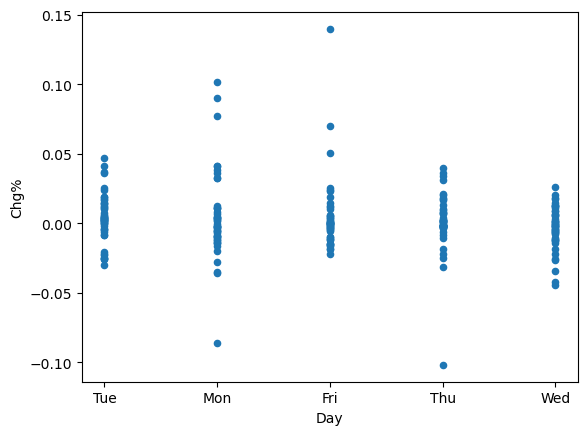

In [17]:
irctcdata.plot(x = "Day",y = "Chg%",kind = "scatter")

**A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the
following tasks:**

In [18]:
#Data Exploration
thyroid_data = df['thyroid0387_UCI']
thyroid_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128,f,?,f,?,f,?,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,11,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,26,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,?,f,?,f,?,t,36,other,S


**Study each attribute and associated values present. Identify the datatype (nominal etc.)
for the attribute.**

In [19]:
#A5
#categorizing data
def Categorize():
    global numeric_columns,categorical_columns
    numeric_columns = thyroid_data.select_dtypes(include=['number']).columns
    categorical_columns = thyroid_data.select_dtypes(include=['object']).columns
    
Categorize()
print("Numeric Columns:", numeric_columns)
print("\nCategorical Columns:", categorical_columns)

Numeric Columns: Index(['Record ID', 'age'], dtype='object')

Categorical Columns: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


**For categorical attributes, identify the encoding scheme to be employed. (Guidance:
employ label encoding for ordinal variables while One-Hot encoding may be employed
for nominal variables).**

In [20]:
def oneHotEncode():
    df_encoded = pd.get_dummies(thyroid_data, columns=categorical_columns)
    print(df_encoded)
oneHotEncode()

      Record ID  age  sex_?  sex_F  sex_M  on thyroxine_f  on thyroxine_t  \
0     840801013   29  False   True  False            True           False   
1     840801014   29  False   True  False            True           False   
2     840801042   41  False   True  False            True           False   
3     840803046   36  False   True  False            True           False   
4     840803047   32  False   True  False            True           False   
...         ...  ...    ...    ...    ...             ...             ...   
9167  870119022   56  False  False   True            True           False   
9168  870119023   22  False  False   True            True           False   
9169  870119025   69  False  False   True            True           False   
9170  870119027   47  False   True  False            True           False   
9171  870119035   31  False  False   True            True           False   

      query on thyroxine_f  query on thyroxine_t  on antithyroid medication

**Study the data range for numeric variables.Study the presence of missing values in each attribute.**

In [21]:
def preprocessData():
    global numeric_df
    thyroid_data.replace("?",np.nan,inplace = True)
    numeric_df = thyroid_data.select_dtypes(include=['number'])
preprocessData() #preprocessing here is removing ? and putting np.nan so range can be found

In [22]:
numeric_df.head()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
0,840801013,29,0.3,NaN,NaN,NaN,NaN,NaN
1,840801014,29,1.6,1.9,128.0,NaN,NaN,NaN
2,840801042,41,NaN,NaN,NaN,NaN,NaN,11.0
3,840803046,36,NaN,NaN,NaN,NaN,NaN,26.0
4,840803047,32,NaN,NaN,NaN,NaN,NaN,36.0


In [23]:
def getrange_emptycount(colname):
    print(colname,"range:", numeric_df[colname].max() - numeric_df[colname].min())
    print(colname,"emptycount:",numeric_df[colname].isnull().sum(),"\n")
for column in numeric_df.columns:
    getrange_emptycount(column)

Record ID range: 29318022
Record ID emptycount: 0 

age range: 65525
age emptycount: 0 

TSH range: 529.995
TSH emptycount: 842 

T3 range: 17.95
T3 emptycount: 2604 

TT4 range: 598.0
TT4 emptycount: 442 

T4U range: 2.16
T4U emptycount: 809 

FTI range: 879.6
FTI emptycount: 802 

TBG range: 199.9
TBG emptycount: 8823 



**Study presence of outliers in data.**

In [24]:
import matplotlib.pyplot as plt

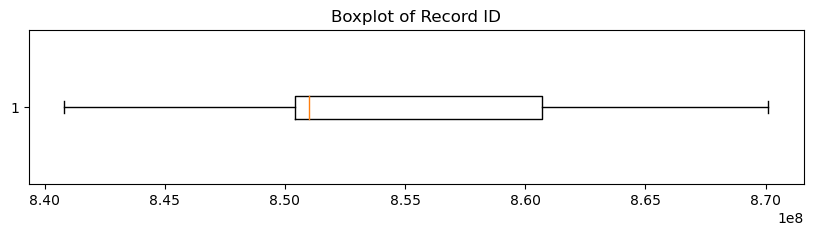

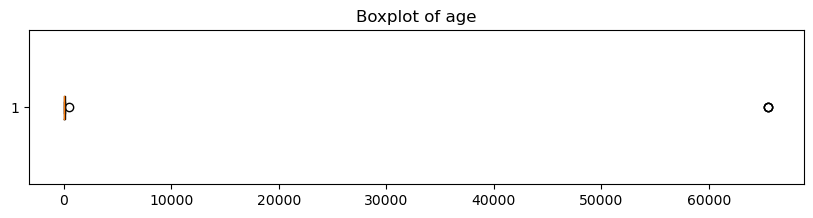

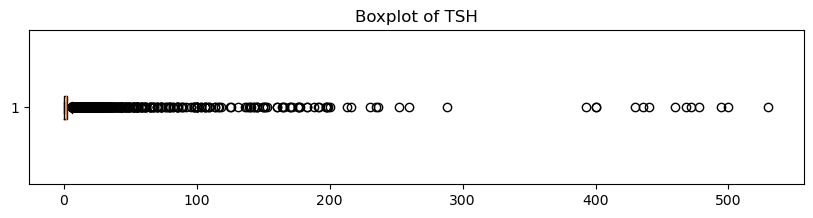

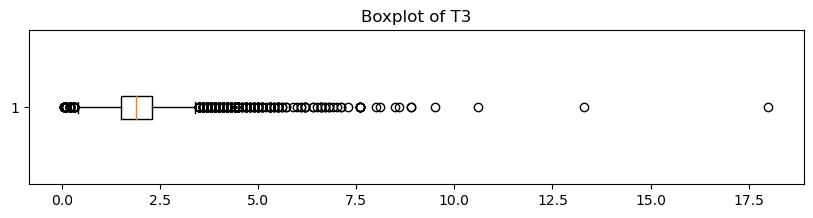

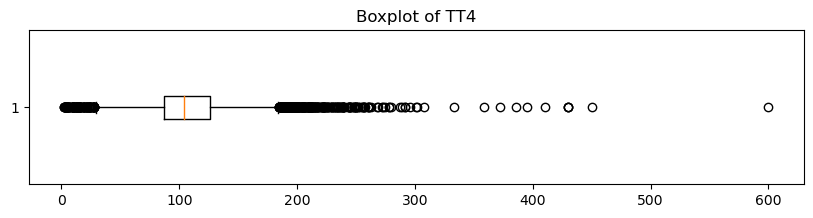

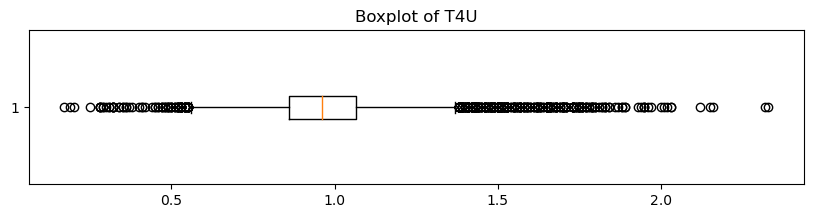

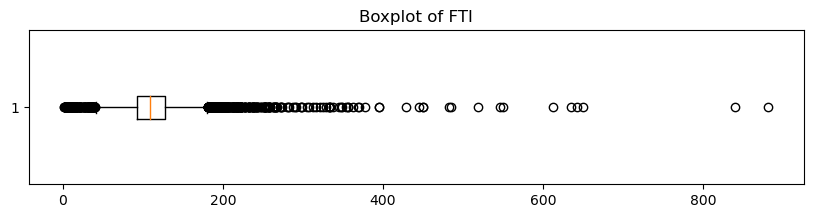

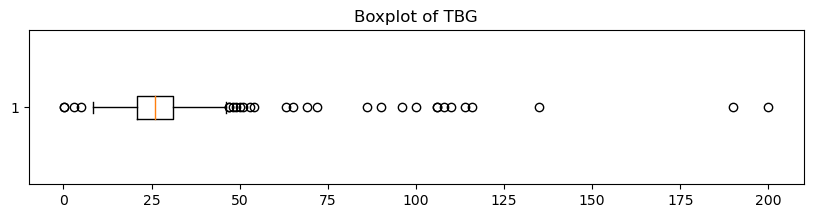

In [25]:
for column in numeric_df.columns:
    plt.figure(figsize=(10, 2))
    plt.boxplot(numeric_df[column].dropna(),vert=False)
    plt.title(f"Boxplot of {column}")
    plt.show()

**For numeric variables, calculate the mean and variance (or standard deviation).**

In [26]:
def mean_variance(column):
    print(column,"\nmean:",numeric_df[column].mean(),"\nvariance:",numeric_df[column].var(),"\n")
for column in numeric_df.columns:
    mean_variance(column)

Record ID 
mean: 852947346.6122983 
variance: 57486250586150.34 

age 
mean: 73.55582206716092 
variance: 1401800.8688713463 

TSH 
mean: 5.218402753781513 
variance: 584.866153209295 

T3 
mean: 1.970628805724726 
variance: 0.7877961683561565 

TT4 
mean: 108.70030469644902 
variance: 1407.950791475491 

T4U 
mean: 0.9760557216309935 
variance: 0.04014430639006391 

FTI 
mean: 113.64074551935484 
variance: 1726.539585061158 

TBG 
mean: 29.87005729512894 
variance: 444.38764299946627 



**A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data
variables. Employ following guidance. Mean may be used when the attribute is numeric with no outliers.
Median may be employed for attributes which are numeric and contain outliers. Mode may be employed for categorical attributes**

In [27]:
#outlier presence
def check_present(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    bound1 = q1-1.5*iqr
    bound2 = q3+1.5*iqr
    val =len(df[ (df[column]<bound1) | (df[column]>bound2) ])
    if val == 0:
        return False
    else:
        return True

In [28]:
#Impute missing values
for column in thyroid_data.columns:
    if thyroid_data[column].isnull().sum() > 0:
        if thyroid_data[column].dtype == 'object':
            thyroid_data[column].fillna(thyroid_data[column].mode()[0], inplace=True)
        else:
            if check_present(thyroid_data,column):
                thyroid_data[column].fillna(thyroid_data[column].median(), inplace=True)
            else:
                thyroid_data[column].fillna(thyroid_data[column].mean(), inplace=True)
thyroid_data.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S


**A7. Data Normalization / Scaling: from the data study, identify the attributes which may need
normalization. Employ appropriate normalization techniques to create normalized set of data.**

In [29]:
def normalize(df,column):
    min_val = np.min(df[column])
    max_val = np.max(df[column])
    normalized_column = [(x - min_val) / (max_val - min_val) for x in df[column]]
    return normalized_column

def NumericNormalize():
    numeric_columns = thyroid_data.select_dtypes(include=['number']).columns
    # Normalize each numeric column
    normalized_data = thyroid_data[numeric_columns]
    normalized_data.dropna(inplace=True)
    for column in numeric_columns:
        normalized_data[column] = normalize(normalized_data,column)
    return normalized_data
normalized_data = NumericNormalize()
normalized_data.head()

/tmp/ipykernel_14359/1878499828.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_data.dropna(inplace=True)
/tmp/ipykernel_14359/1878499828.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_data[column] = normalize(normalized_data,column)


,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
0,0.000000e+00,0.000427,0.000557,0.103064,0.170569,0.365741,0.122328,0.129565
1,3.410871e-08,0.000427,0.003009,0.103064,0.210702,0.365741,0.122328,0.129565
2,9.891527e-07,0.000610,0.002632,0.103064,0.170569,0.365741,0.122328,0.054527
3,6.934301e-05,0.000534,0.002632,0.103064,0.170569,0.365741,0.122328,0.129565
4,6.937712e-05,0.000473,0.002632,0.103064,0.170569,0.365741,0.122328,0.179590


**A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors.
Use first vector for each document for this. Compare the values for JC and SMC and judge the
appropriateness of each of them.**

In [30]:
#accessing two observations
binary_attr = []
for column in thyroid_data.columns:
    if(len(pd.unique(thyroid_data[column])) == 2):
        binary_attr.append(column)

binary_df = thyroid_data[binary_attr]

for column in binary_df.columns:
    unilist = pd.unique(binary_df[column])
    unilist.sort()
    newcolvalue = [ False if x == unilist[0] else True for x in binary_df[column]]
    binary_df.loc[:,column] = newcolvalue

vec1 = binary_df.iloc[0]
vec2 = binary_df.iloc[1]
def Coefficients():
    f11 = sum(vec1 & vec2)
    f01_10 = sum(vec1 ^ vec2)
    f00 = sum(~(vec1 | vec2))
    jc = f11/(f01_10 + f11)
    smc = (f00 + f11)/(f00 + f01_10 + f11)
    print("jaccard coeff:",jc);
    print("Simple Matching coeff:",smc)
Coefficients()

jaccard coeff: 0.25
Simple Matching coeff: 0.8571428571428571


**A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including
all the attributes). Calculate the Cosine similarity between the documents by using the second
feature vector for each document.**

In [31]:
#cosine similarity
import math

v1 = normalized_data.iloc[0]
v2 = normalized_data.iloc[1]
for x in vec1.index:
    v1[x] = 1 if vec1[x] == True else 0
    v2[x] = 1 if vec2[x] == True else 0

v1 = v1[1:-2]
v2 = v2[1:-2]
def cosine_similarity(v1,v2):
    dot_pro = sum([x*y for x,y in zip(v1,v2)])
    magv1 = getlen(v1)
    magv2 = getlen(v2)
    return dot_pro/(magv1*magv2)
def getlen(v):
    magv = math.sqrt(sum([x**2 for x in v]))
    return magv

print("cosine similarity measure:",cosine_similarity(v1,v2))

cosine similarity measure: 0.45482004229128115


/tmp/ipykernel_14359/86911981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1[x] = 1 if vec1[x] == True else 0
/tmp/ipykernel_14359/86911981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1[x] = 1 if vec1[x] == True else 0
/tmp/ipykernel_14359/86911981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2[x] = 1 if vec2[x] == True else 0
/tmp/ipykernel_14359/86911981.py:8: SettingWithCopyWarning: 
A value is trying to be 

**A10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.**

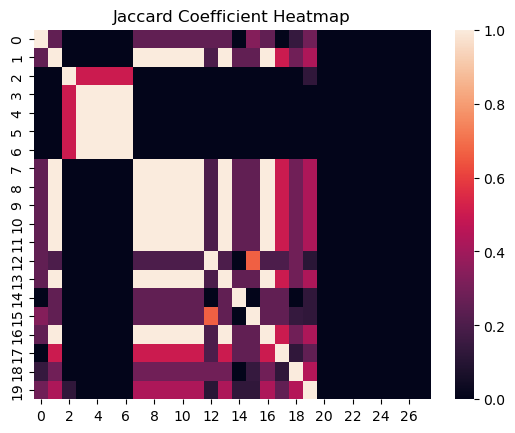

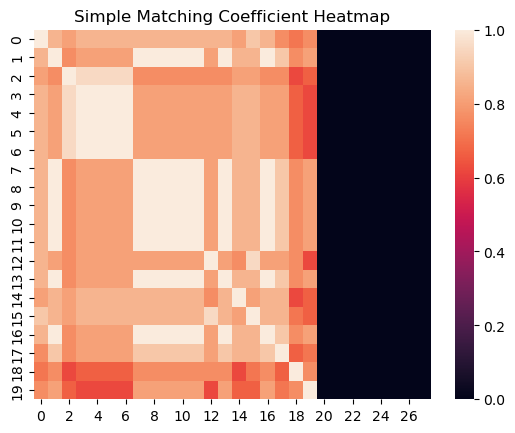

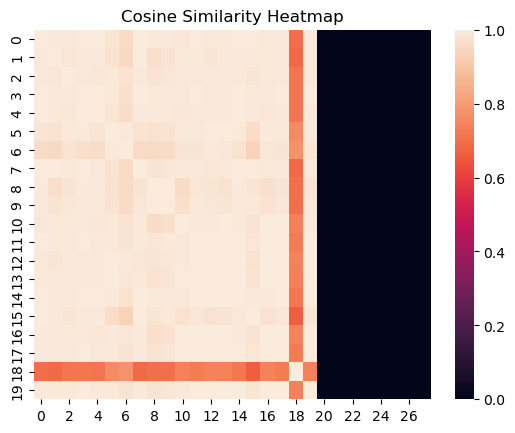

In [32]:
import seaborn as sns
# Select the first 20 observations
subset_data = thyroid_data.iloc[:20,1:-2].bfill()


for i in range(0,20):
    for column in binary_df.columns:
        subset_data.loc[i,column] = 1 if binary_df.loc[i,column] == True else 0

# Initialize matrices for JC, SMC, and Cosine Similarity
jc_matrix = np.zeros((20,len(subset_data.columns)))
smc_matrix = np.zeros((20,len(subset_data.columns)))
cos_matrix = np.zeros((20, len(subset_data.columns)))

# Calculate JC, SMC, and COS for each pair of vectors
for i in range(20):
    for j in range(i,20):
        vec1 = subset_data.loc[i,binary_attr]
        vec2 = subset_data.loc[j,binary_attr]
        # JC Calculation
        f11 = sum(vec1 & vec2)
        f01_10 = sum(vec1 ^ vec2)
        f00 = sum(~(vec1 | vec2))
                  
        denominator_jc = (f01_10 + f11)
        if denominator_jc == 0:
            jc_matrix[i, j] = jc_matrix[j, i] = 0  # Symmetric matrix
        else:
            jc_matrix[i, j] = jc_matrix[j, i] = f11 / denominator_jc  # Symmetric matrix
        
        # SMC Calculation
        denominator_smc = (f00 + f01_10 + f11)
        if denominator_smc == 0:
            smc_matrix[i, j] = smc_matrix[j, i] = 0  # Symmetric matrix
        else:
            smc_matrix[i, j] = smc_matrix[j, i] = (f11 + f00) / denominator_smc  # Symmetric matrix
        
        # Cosine Similarity Calculation
        vec1 = subset_data.iloc[i]
        vec2 = subset_data.iloc[j]
        cos_matrix[i, j] = cos_matrix[j, i] = cosine_similarity(vec1, vec2)  # Symmetric matrix

# Plot Heatmaps
sns.heatmap(jc_matrix)
plt.title('Jaccard Coefficient Heatmap')
plt.show()

sns.heatmap(smc_matrix)
plt.title('Simple Matching Coefficient Heatmap')
plt.show()

sns.heatmap(cos_matrix)
plt.title('Cosine Similarity Heatmap')
plt.show()
